In [1]:
# import the needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in the file 
users_df = pd.read_csv(r'C:\Users\agozi\Desktop\Ride\users.csv')
ride_requests_df = pd.read_csv(r'C:\Users\agozi\Desktop\Ride\ride_requests.csv')
rides_df = pd.read_csv(r'C:\Users\agozi\Desktop\Ride\rides.csv')
feedback_df = pd.read_csv(r'C:\Users\agozi\Desktop\Ride\feedback.csv')
engagement_df = pd.read_csv(r'C:\Users\agozi\Desktop\Ride\engagement.csv')

# Merge the datasets 

In [2]:
# Merge DataFrames sequentially
merged_df = pd.merge(users_df, ride_requests_df, on='UserID', how='outer')
merged_df = pd.merge(merged_df, rides_df, on='UserID', how='outer')
merged_df = pd.merge(merged_df, feedback_df, on='UserID', how='outer')
merged_df = pd.merge(merged_df, engagement_df, on='UserID', how='outer')
#merged_df = pd.merge(merged_df, df6, on='user_id', how='inner')

merged_df = pd.DataFrame(merged_df)

# Print the final merged DataFrame
merged_df.head()

,UserID,SignupDate,Age,Gender,Location,UserSegment,RequestID_x,Timestamp,PickupLocation,DestinationLocation,...,StartTimestamp,EndTimestamp,Distance,Duration,Fare,RideID_y,RideRating,RideReview,AppOpens,Bookings
0,190746,2022-05-16,42,Male,Jacksonbury,Control,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,3.0
1,47745,2022-06-30,35,Female,Robertfurt,Control,NaN,NaN,NaN,NaN,...,2024-04-22 11:58:28,2024-04-22 12:38:28,21.29,40.0,78.74,220415.0,4.0,Feel reflect strong very lead increase rich in...,16.0,4.0
2,166032,2024-04-16,49,Male,New Teresa,Control,171266.0,2024-02-17 10:44:16,"0309 Stevens Island\nStoutfurt, PW 60797","29893 Daniels Plain Apt. 958\nKellyfurt, AZ 62177",...,2024-06-02 03:38:20,2024-06-02 04:32:20,33.08,54.0,72.84,NaN,NaN,NaN,NaN,NaN
3,166032,2024-04-16,49,Male,New Teresa,Control,171266.0,2024-02-17 10:44:16,"0309 Stevens Island\nStoutfurt, PW 60797","29893 Daniels Plain Apt. 958\nKellyfurt, AZ 62177",...,2024-05-18 13:38:15,2024-05-18 14:12:15,38.79,34.0,26.87,NaN,NaN,NaN,NaN,NaN
4,81053,2023-06-13,70,Male,East Kristinfort,Control,224246.0,2024-05-18 08:37:48,"5178 Duncan Prairie Apt. 191\nHarrishaven, VA ...","9890 Romero Locks Apt. 497\nGuyhaven, ID 09062",...,2024-05-28 03:40:23,2024-05-28 04:25:23,86.38,45.0,83.37,56783.0,3.0,Time include fly term national price go challe...,NaN,NaN


In [3]:
# Get all column names
column_names = merged_df.columns.tolist()
print(column_names)

['UserID', 'SignupDate', 'Age', 'Gender', 'Location', 'UserSegment', 'RequestID_x', 'Timestamp', 'PickupLocation', 'DestinationLocation', 'DriverID_x', 'MatchPrediction', 'RideID_x', 'RequestID_y', 'DriverID_y', 'StartTimestamp', 'EndTimestamp', 'Distance', 'Duration', 'Fare', 'RideID_y', 'RideRating', 'RideReview', 'AppOpens', 'Bookings']


# Data Cleaning And Preprocessing

In [4]:
# Drop unnecessary columns
merged_df.drop(columns=['RequestID_y', 'DriverID_y', 'StartTimestamp', 'EndTimestamp', 'RideID_y'], inplace=True)

In [5]:
merged_df

,UserID,SignupDate,Age,Gender,Location,UserSegment,RequestID_x,Timestamp,PickupLocation,DestinationLocation,DriverID_x,MatchPrediction,RideID_x,Distance,Duration,Fare,RideRating,RideReview,AppOpens,Bookings
0,190746,2022-05-16,42,Male,Jacksonbury,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,3.0
1,47745,2022-06-30,35,Female,Robertfurt,Control,NaN,NaN,NaN,NaN,NaN,NaN,53319.0,21.29,40.0,78.74,4.0,Feel reflect strong very lead increase rich in...,16.0,4.0
2,166032,2024-04-16,49,Male,New Teresa,Control,171266.0,2024-02-17 10:44:16,"0309 Stevens Island\nStoutfurt, PW 60797","29893 Daniels Plain Apt. 958\nKellyfurt, AZ 62177",450.0,False,239549.0,33.08,54.0,72.84,NaN,NaN,NaN,NaN
3,166032,2024-04-16,49,Male,New Teresa,Control,171266.0,2024-02-17 10:44:16,"0309 Stevens Island\nStoutfurt, PW 60797","29893 Daniels Plain Apt. 958\nKellyfurt, AZ 62177",450.0,False,157944.0,38.79,34.0,26.87,NaN,NaN,NaN,NaN
4,81053,2023-06-13,70,Male,East Kristinfort,Control,224246.0,2024-05-18 08:37:48,"5178 Duncan Prairie Apt. 191\nHarrishaven, VA ...","9890 Romero Locks Apt. 497\nGuyhaven, ID 09062",786.0,False,107617.0,86.38,45.0,83.37,3.0,Time include fly term national price go challe...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893881,2144,2021-01-10,37,Male,Tarafort,Test,NaN,NaN,NaN,NaN,NaN,NaN,55849.0,47.18,13.0,61.19,NaN,NaN,94.0,34.0
893882,30852,2021-10-12,54,Female,Michaelport,Test,83111.0,2024-02-02 07:26:50,"88193 Melissa Unions\nRobinsonport, RI 20668","53289 Gallegos Flats\nNew Susan, MA 20054",769.0,True,191082.0,60.37,27.0,68.28,NaN,NaN,42.0,15.0
893883,30852,2021-10-12,54,Female,Michaelport,Test,83111.0,2024-02-02 07:26:50,"88193 Melissa Unions\nRobinsonport, RI 20668","53289 Gallegos Flats\nNew Susan, MA 20054",769.0,True,19285.0,18.22,34.0,91.03,NaN,NaN,42.0,15.0
893884,30852,2021-10-12,54,Female,Michaelport,Test,83111.0,2024-02-02 07:26:50,"88193 Melissa Unions\nRobinsonport, RI 20668","53289 Gallegos Flats\nNew Susan, MA 20054",769.0,True,127233.0,95.91,28.0,67.31,NaN,NaN,42.0,15.0


In [6]:
merged_df.isnull().sum()

UserID                      0
SignupDate                  0
Age                         0
Gender                      0
Location                    0
UserSegment                 0
RequestID_x            240762
Timestamp              240762
PickupLocation         240762
DestinationLocation    240762
DriverID_x             240762
MatchPrediction        240762
RideID_x               239379
Distance               239379
Duration               239379
Fare                   239379
RideRating             240588
RideReview             240588
AppOpens               239148
Bookings               239148
dtype: int64

In [7]:
# Drop duplicates based on UserID, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='RideID_x', keep='first')

In [8]:
# Check for duplicates in the UserID column
duplicates_exist = merged_df['RideID_x'].duplicated().any()

if duplicates_exist:
    print("There are duplicates in the RideID_x column.")
else:
    print("There are no duplicates in the RideID_x column.")

There are no duplicates in the RideID_x column.


In [9]:
# Get the total number of unique UserID
total_unique_users = merged_df['RideID_x'].nunique()
print("Total number of unique RideID_x:", total_unique_users)

Total number of unique RideID_x: 161363


In [10]:
# Drop rows where MatchPrediction is NaN
merged_df = merged_df.dropna(subset=['MatchPrediction'])

#check for null values
merged_df.isnull().sum()

UserID                     0
SignupDate                 0
Age                        0
Gender                     0
Location                   0
UserSegment                0
RequestID_x                0
Timestamp                  0
PickupLocation             0
DestinationLocation        0
DriverID_x                 0
MatchPrediction            0
RideID_x                   0
Distance                   0
Duration                   0
Fare                       0
RideRating             37553
RideReview             37553
AppOpens               36975
Bookings               36975
dtype: int64

In [11]:
# Drop unnecessary columns
merged_df.drop(columns=['UserID', 'Distance', 'Duration', 'Fare', 'RideReview', 'AppOpens'], inplace=True)

In [12]:
#check for null values
merged_df.isnull().sum()

SignupDate                 0
Age                        0
Gender                     0
Location                   0
UserSegment                0
RequestID_x                0
Timestamp                  0
PickupLocation             0
DestinationLocation        0
DriverID_x                 0
MatchPrediction            0
RideID_x                   0
RideRating             37553
Bookings               36975
dtype: int64

In [13]:
#check number of rides without rating or booking

# Step 1: Filter the DataFrame
nan_rows = merged_df[merged_df['RideRating'].isna() & merged_df['Bookings'].isna()]

# Step 2: Select the user_id column and get unique values
unique_user_ids = nan_rows['RideID_x'].unique()

# Step 3: Get the count of unique user_ids
number_of_unique_user_ids = len(unique_user_ids)

print(f'The number of unique user IDs with NaN RideRating and bookings: {number_of_unique_user_ids}')


The number of unique user IDs with NaN RideRating and bookings: 13751


In [15]:
# Identify the rides with both RideRating and bookings as NaN
nan_user_ids = merged_df[merged_df['RideRating'].isna() & merged_df['Bookings'].isna()]['RideID_x'].unique()

#Filter out these user IDs from the original DataFrame
filtered_df = merged_df[~merged_df['RideID_x'].isin(nan_user_ids)]

#update merged_df in place
merged_df = filtered_df

In [16]:
# Step 1: Identify the user IDs with either RideRating or bookings as NaN
nan_user_ids = merged_df[merged_df['RideRating'].isna() | merged_df['Bookings'].isna()]['RideID_x'].unique()

# Step 2: Filter out these user IDs from the original DataFrame
filtered_df = merged_df[~merged_df['RideID_x'].isin(nan_user_ids)]

# If you want to update merged_df in place
merged_df = filtered_df

In [17]:
# Update 'MatchPrediction' to 'test' where 'UserSegment' is 'Test'
merged_df.loc[merged_df['UserSegment'] == 'Control', 'MatchPrediction'] = 'control'

In [18]:
merged_df

,SignupDate,Age,Gender,Location,UserSegment,RequestID_x,Timestamp,PickupLocation,DestinationLocation,DriverID_x,MatchPrediction,RideID_x,RideRating,Bookings
20,2022-01-31,49,Male,Jamesville,Control,108661.0,2024-04-20 09:56:44,"444 Rodriguez Dam\nBraybury, NV 42670","339 Thomas Circles Apt. 011\nLake Jamesshire, ...",30.0,control,241292.0,1.0,26.0
37,2020-11-12,29,Male,North Heather,Control,246102.0,2024-02-05 20:33:31,"23910 Griffith Radial Apt. 645\nLake Ashley, A...","514 Leon Squares\nNorth Danielle, MS 49825",71.0,control,97738.0,3.0,10.0
39,2020-11-12,29,Male,North Heather,Control,246102.0,2024-02-05 20:33:31,"23910 Griffith Radial Apt. 645\nLake Ashley, A...","514 Leon Squares\nNorth Danielle, MS 49825",71.0,control,190673.0,3.0,10.0
41,2023-12-02,70,Female,Mitchellport,Control,92499.0,2024-02-23 16:13:31,49178 Barrett Junction Apt. 380\nSouth Kristin...,"797 Daniel Landing Suite 364\nEast Robert, AK ...",651.0,control,140352.0,3.0,36.0
53,2023-12-02,70,Female,Mitchellport,Control,92499.0,2024-02-23 16:13:31,49178 Barrett Junction Apt. 380\nSouth Kristin...,"797 Daniel Landing Suite 364\nEast Robert, AK ...",651.0,control,53098.0,3.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893745,2020-05-08,65,Female,Anafort,Test,82524.0,2024-06-01 19:09:06,"09834 Cox Wells Suite 726\nBarronport, OH 18461","12807 Courtney Union\nEast Mirandashire, PW 72552",227.0,True,197455.0,5.0,35.0
893768,2023-06-01,31,Female,Lake Alec,Test,5260.0,2024-04-20 19:47:16,"0459 Tyler Overpass\nRichardstad, NE 97409","6151 Vargas Mission\nJohnmouth, NJ 98848",29.0,False,114386.0,1.0,19.0
893790,2020-01-02,33,Male,Matthewhaven,Test,96494.0,2024-03-11 03:54:01,"615 Johns Circles Suite 847\nPort Staceymouth,...","190 Donald Lake\nEast Martinland, HI 82262",49.0,True,187182.0,2.0,1.0
893813,2023-07-29,37,Male,Port Jamesmouth,Test,148279.0,2024-03-22 02:59:29,"310 Ford Village\nPort Tonitown, SC 21117","8916 Grant Spurs\nLake Sharon, NM 50516",964.0,False,21277.0,2.0,11.0


In [19]:
# lets check the distribution of the data
merged_df.describe()

,Age,RequestID_x,DriverID_x,RideID_x,RideRating,Bookings
count,40911.000000,40911.000000,40911.000000,40911.000000,40911.000000,40911.000000
mean,43.879666,106386.280169,499.280511,127327.743174,2.995356,20.516243
std,15.219156,71838.901266,289.144578,73844.468351,1.416900,11.540316
min,18.000000,15.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,44088.000000,248.000000,63266.000000,2.000000,11.000000
50%,44.000000,96250.000000,498.000000,126917.000000,3.000000,20.000000
75%,57.000000,164068.500000,749.000000,191612.500000,4.000000,31.000000
max,70.000000,254984.000000,1000.000000,254996.000000,5.000000,40.000000


# EDA And Visualiztion  

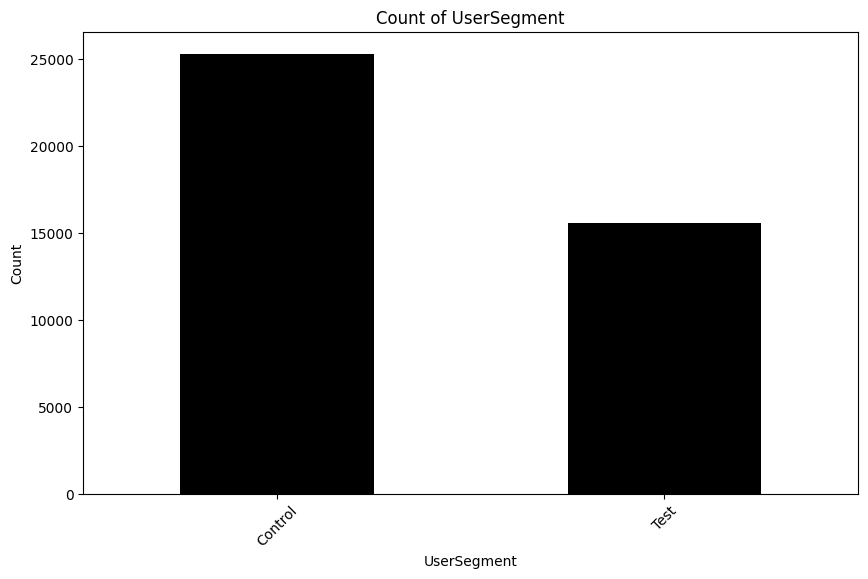

In [20]:
import matplotlib.pyplot as plt

user_segment_counts = merged_df['UserSegment'].value_counts()

# Step 2: Create the bar plot
plt.figure(figsize=(10, 6))
user_segment_counts.plot(kind='bar', color='black')
plt.title('Count of UserSegment')
plt.xlabel('UserSegment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
# count of each group
group_counts = merged_df['UserSegment'].value_counts().reset_index()
group_counts.columns = ['UserSegment', 'Count']
print(group_counts)

  UserSegment  Count
0     Control  25294
1        Test  15617


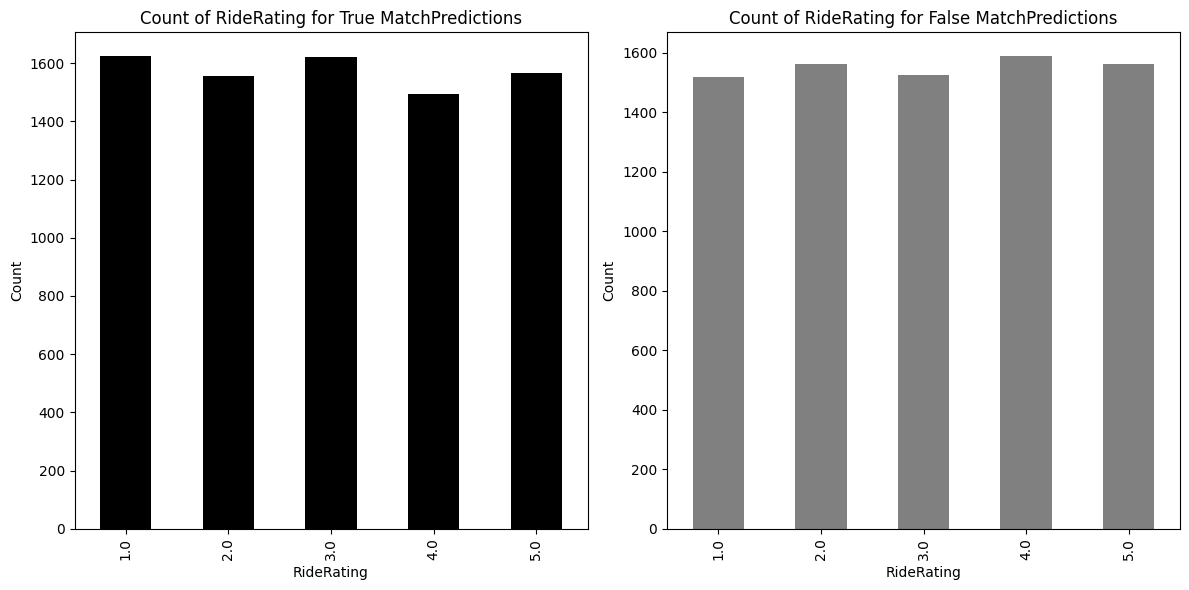

In [22]:
# Filter DataFrame for rows where MatchPrediction is True and False
true_predictions = merged_df[merged_df['MatchPrediction'] == True]
false_predictions = merged_df[merged_df['MatchPrediction'] == False]

# Count occurrences of RideRating for each group
true_rating_counts = true_predictions['RideRating'].value_counts().sort_index()
false_rating_counts = false_predictions['RideRating'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for True MatchPredictions
plt.subplot(1, 2, 1)
true_rating_counts.plot(kind='bar', color='black')
plt.title('Count of RideRating for True MatchPredictions')
plt.xlabel('RideRating')
plt.ylabel('Count')

# Plot for False MatchPredictions
plt.subplot(1, 2, 2)
false_rating_counts.plot(kind='bar', color='gray')
plt.title('Count of RideRating for False MatchPredictions')
plt.xlabel('RideRating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


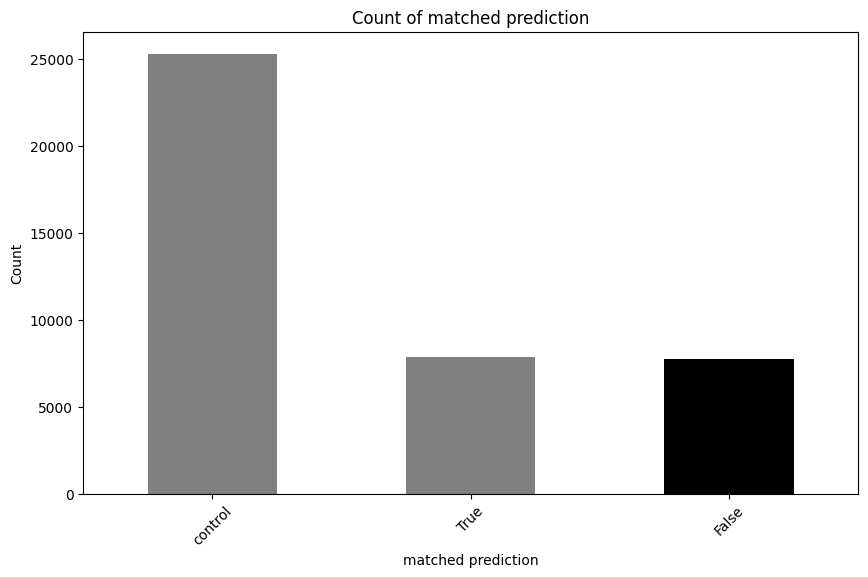

In [23]:
perdiction_counts = merged_df['MatchPrediction'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
perdiction_counts.plot(kind='bar', color=['gray', 'gray', 'black'])
plt.title('Count of matched prediction')
plt.xlabel('matched prediction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

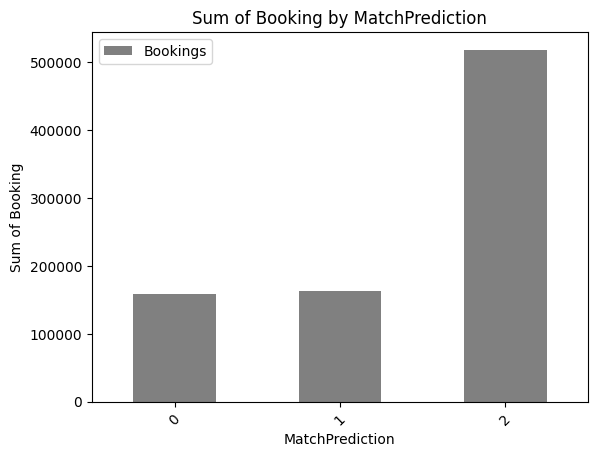

In [24]:
booking_sum = merged_df.groupby('MatchPrediction')['Bookings'].sum().reset_index()



# Plotting the bar chart using seaborn with the custom color palette
plt.figure(figsize=(10, 6))
booking_sum.plot(kind='bar', color=['gray', 'black', 'black'])
plt.xlabel('MatchPrediction')
plt.ylabel('Sum of Booking')
plt.title('Sum of Booking by MatchPrediction')
plt.xticks(rotation=45)

plt.show()

In [29]:
control_sample = merged_df[merged_df['UserSegment'] == 'Control'].sample(n=10000, random_state=42)
treatment_sample = merged_df[merged_df['UserSegment'] == 'Test'].sample(n=10000, random_state=42)

test_sample = pd.concat([control_sample, treatment_sample], axis=0)
test_sample.reset_index(drop=True, inplace=True)
test_sample

,SignupDate,Age,Gender,Location,UserSegment,RequestID_x,Timestamp,PickupLocation,DestinationLocation,DriverID_x,MatchPrediction,RideID_x,RideRating,Bookings
0,2020-10-06,45,Male,New Michelle,Control,180004.0,2024-05-17 03:59:34,"730 Felicia Common Suite 121\nWeaverborough, M...",7780 Norman Light Suite 241\nNorth Timothytown...,842.0,control,54026.0,2.0,25.0
1,2023-12-21,40,Male,Katrinaburgh,Control,208618.0,2024-02-02 15:39:52,"6750 Rodriguez Squares\nAlyssaton, WA 73698","093 Arnold Ways\nMichaelstad, ME 15580",522.0,control,61848.0,2.0,23.0
2,2022-12-14,61,Male,Hesterberg,Control,30437.0,2024-05-27 13:27:47,"17006 Walker Ridges Suite 798\nLake Kristen, N...","621 Christopher Flats Apt. 870\nGeorgeburgh, N...",174.0,control,109393.0,3.0,35.0
3,2023-10-17,22,Female,South Austinshire,Control,208130.0,2024-04-04 23:24:43,"8960 Pennington Cliff Suite 194\nBrownbury, CO...","99173 Leonard Radial Suite 290\nScottside, VI ...",343.0,control,68959.0,2.0,3.0
4,2021-03-13,29,Male,Smithbury,Control,7393.0,2024-01-03 04:04:01,"22519 Sierra Avenue\nTammytown, NC 36266","0997 Gonzalez Inlet Suite 833\nPort Michael, M...",675.0,control,55181.0,3.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2024-01-27,32,Female,Schaefermouth,Test,91939.0,2024-02-07 10:31:31,"20103 Brandon Ridge\nBrendaberg, CT 64593",1180 Joseph Radial Apt. 192\nSouth Melanieview...,112.0,True,141560.0,4.0,31.0
19996,2023-05-07,38,Female,North Leahburgh,Test,224981.0,2024-04-29 20:05:02,"615 Timothy Ridges\nCombsburgh, PA 83421","742 Briggs Bridge\nSouth Dawn, GU 63167",764.0,False,39049.0,4.0,12.0
19997,2022-03-26,19,Female,Rebeccaside,Test,112457.0,2024-06-09 07:38:59,"7199 Stuart Views\nJessicafurt, LA 15960","79997 Henry Place\nDavidfurt, NC 84441",100.0,False,140545.0,4.0,36.0
19998,2024-03-19,50,Male,South Stacy,Test,154193.0,2024-03-29 08:40:35,USCGC Moody\nFPO AE 52076,"799 Baker Lock\nBuchananton, TX 93646",844.0,False,252280.0,2.0,25.0


# A/B Testing

In [28]:
# Define the retention criteria
booking_threshold = 4
test_sample['Retained'] = test_sample['Bookings'] > booking_threshold

# Calculate retention rate for each segment
segment_counts = test_sample.groupby('UserSegment').size().reset_index(name='TotalUsers')
retained_counts = test_sample[test_sample['Retained']].groupby('UserSegment').size().reset_index(name='RetainedUsers')

# Merge to get total users and retained users in one DataFrame
retention_rates = pd.merge(segment_counts, retained_counts, on='UserSegment', how='left')

# Calculate retention rates as percentage
retention_rates['RetentionRate (%)'] = (retention_rates['RetainedUsers'] / retention_rates['TotalUsers']) * 100

# Replace NaN values with 0 for segments with no retained users
retention_rates['RetentionRate (%)'].fillna(0, inplace=True)

# Select only the relevant columns
retention_rates = retention_rates[['UserSegment', 'RetentionRate (%)']]

print(retention_rates)

  UserSegment  RetentionRate (%)
0     Control          89.522293
1        Test          90.127389


In [29]:
# Define the retention criteria
booking_threshold = 4
test_sample['Satisfied'] = test_sample['RideRating'] > booking_threshold

# Calculate retention rate for each segment
segment_count = test_sample.groupby('UserSegment').size().reset_index(name='TotalUsers')
Satisfied_counts = test_sample[test_sample['Satisfied']].groupby('UserSegment').size().reset_index(name='SatisfiedUsers')

# Merge to get total users and Satisfied users in one DataFrame
Satisfied_rates = pd.merge(segment_count, Satisfied_counts, on='UserSegment', how='left')

# Calculate Satisfied rates as percentage
Satisfied_rates['SatisfactionRate (%)'] = (Satisfied_rates['SatisfiedUsers'] / Satisfied_rates['TotalUsers']) * 100

# Replace NaN values with 0 for segments with no retained users
Satisfied_rates['SatisfactionRate (%)'].fillna(0, inplace=True)

# Select only the relevant columns
Satisfied_rates = Satisfied_rates[['UserSegment', 'SatisfactionRate (%)']]

print(Satisfied_rates)

  UserSegment  SatisfactionRate (%)
0     Control             20.127389
1        Test             19.410828


In [30]:
# Define the retention criteria
booking_threshold = 4
test_sample['Retained'] = test_sample['Bookings'] > booking_threshold

# Calculate retention rate for each segment
segment_counts = test_sample.groupby('MatchPrediction').size().reset_index(name='TotalUsers')
retained_counts = test_sample[test_sample['Retained']].groupby('MatchPrediction').size().reset_index(name='RetainedUsers')

# Merge to get total users and retained users in one DataFrame
retention_rates = pd.merge(segment_counts, retained_counts, on='MatchPrediction', how='left')

# Calculate retention rates as percentage
retention_rates['RetentionRate (%)'] = (retention_rates['RetainedUsers'] / retention_rates['TotalUsers']) * 100

# Replace NaN values with 0 for segments with no retained users
retention_rates['RetentionRate (%)'].fillna(0, inplace=True)

# Select only the relevant columns
retention_rates_match = retention_rates[['MatchPrediction', 'RetentionRate (%)']]

print(retention_rates_match)

  MatchPrediction  RetentionRate (%)
0           False          89.520483
1            True          90.737783
2         control          89.522293


In [31]:
# Define the retention criteria
booking_threshold = 4.0
test_sample['Satisfied'] = test_sample['RideRating'] > booking_threshold

# Calculate retention rate for each segment
segment_count = test_sample.groupby('MatchPrediction').size().reset_index(name='TotalUsers')
Satisfied_counts = test_sample[test_sample['Satisfied']].groupby('MatchPrediction').size().reset_index(name='SatisfiedUsers')

# Merge to get total users and Satisfied users in one DataFrame
Satisfied_rates = pd.merge(segment_count, Satisfied_counts, on='MatchPrediction', how='left')

# Calculate Satisfied rates as percentage
Satisfied_rates['SatisfactionRate (%)'] = (Satisfied_rates['SatisfiedUsers'] / Satisfied_rates['TotalUsers']) * 100

# Replace NaN values with 0 for segments with no retained users
Satisfied_rates['SatisfactionRate (%)'].fillna(0, inplace=True)

# Select only the relevant columns
Satisfied_rates_match = Satisfied_rates[['MatchPrediction', 'SatisfactionRate (%)']]

print(Satisfied_rates_match)

  MatchPrediction  SatisfactionRate (%)
0           False             19.847571
1            True             18.971575
2         control             20.127389


# Lets Calculate the Lift

In [36]:
# Calculate the lift for user retention rate 
control_rate =   89.522293
test_rate =  90.127389

lift = (test_rate - control_rate) / control_rate

print("Lift for user retention rate:", lift)

Lift for user retention rate: 0.006759165563375247


In [37]:
# Calculate the lift for user satsisfaction rate 
control_rate =  20.127389
test_rate =  19.410828

lift = (test_rate - control_rate) / control_rate

print("Lift user satsisfaction rate :", lift)

Lift user satsisfaction rate : -0.03560128936743868


#                                        Hypothesis Testing

User Retention Rate

Null Hypothesis(H0): The new feature does not affect the retention rate.

Alternative Hypothesis(H1): The new feature affects the retention rate.

User Satisfaction Rate

Null Hypothesis(H0): The new feature does not affect the user satisfaction rate.

Alternative Hypothesis(H1): The new feature affects the user satisfaction rate.

# T -Test

In [38]:
# import statsmodel since i failled to import it ealier
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Convert Retained to binary
test_sample['Retained'] = test_sample['Retained'].astype(int)

# Perform the proportions z-test between the control and treatment groups
c_results = test_sample.loc[test_sample['UserSegment'] == 'Control', 'Retained']
t_results = test_sample.loc[test_sample['UserSegment'] == 'Test', 'Retained']

test_stat, pvalue = proportions_ztest([c_results.sum(), t_results.sum()],
                                      nobs=[len(c_results), len(t_results)])

print(f'Test Stat: {test_stat:.4f}')
print(f'p-value: {pvalue:.4f}')

Test Stat: -1.1216
p-value: 0.2621


In [41]:
# Convert Retained to binary
test_sample['Satisfied'] = test_sample['Satisfied'].astype(int)

# Perform the proportions z-test between the control and treatment groups
c_results = test_sample.loc[test_sample['UserSegment'] == 'Control', 'Satisfied']
t_results = test_sample.loc[test_sample['UserSegment'] == 'Test', 'Satisfied']

test_stat, pvalue = proportions_ztest([c_results.sum(), t_results.sum()],
                                      nobs=[len(c_results), len(t_results)])

print(f'Test Stat: {test_stat:.4f}')
print(f'p-value: {pvalue:.4f}')

Test Stat: 1.0082
p-value: 0.3134


# Chi-square Test

In [39]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(test_sample['UserSegment'], test_sample['Retained'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print(f"\nChi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Contingency Table:
Retained       0     1
UserSegment           
Control      658  5622
Test         620  5660

Chi2 Statistic: 1.1925487412053326
p-value: 0.2748160472337242
Degrees of Freedom: 1
Expected Frequencies:
[[ 639. 5641.]
 [ 639. 5641.]]


# Interpretation

For Retention Rate 

Our p-value was 0.216, which is grater than our alpha of 0.05, thus we reject the null hypothesis and conclude that the new feature affects the retention rate.

For Satisfaction Rate

Our p-value was 0.3134, which is grater than our alpha of 0.05, thus we reject the null hypothesis and conclude that the new feature affects the Satisfaction Rate.

# Decision

From our analysis, we can clearly see that both features affects both the retention rate and satisfaction rate. 
However, when it comes to the decision of rolling out this feature, we have to look at the MDE which we set at 5%.  Both of our metrics failled to meet our MDE target, and so this feature cant be rolled out yet. The satisfaction rate even had a negative lift of -0.036%, which will affect the product negatively if lunched.   

# Conclusion 

Based on our work so far, we strongly advice that this new feature should NOT be rolled out yet until its made better, in such a way that it wont negatively affect the product. 

# Recomendation 

In view of the analysis, the following recommendations where made:

1) This new feature should be worked on to increase its efficiency as it has grate potential. This could be done by adding more metrics like response time, arrival time to it's core, which will make the user experience more pleasurable 

2) The overall efficiency of this app should be monitored to ensure that their is no other reason the users are not having a wonderful experience using our services.